## Name: Muhammad Bilal Khan

## Assignment: 
* Handwritten 10 Sticky notes and convert them into 28 x 28 grayscale. and then  train the model to predict the digits.
* Write a function to name the labels of prediction images.


## Handwritten Image
<img src="images/digits.jpg" width="400"></img>

In [109]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [110]:
# Import the MNIST dataset from TensorFlow
mnist = tf.keras.datasets.mnist

# Load the training and testing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

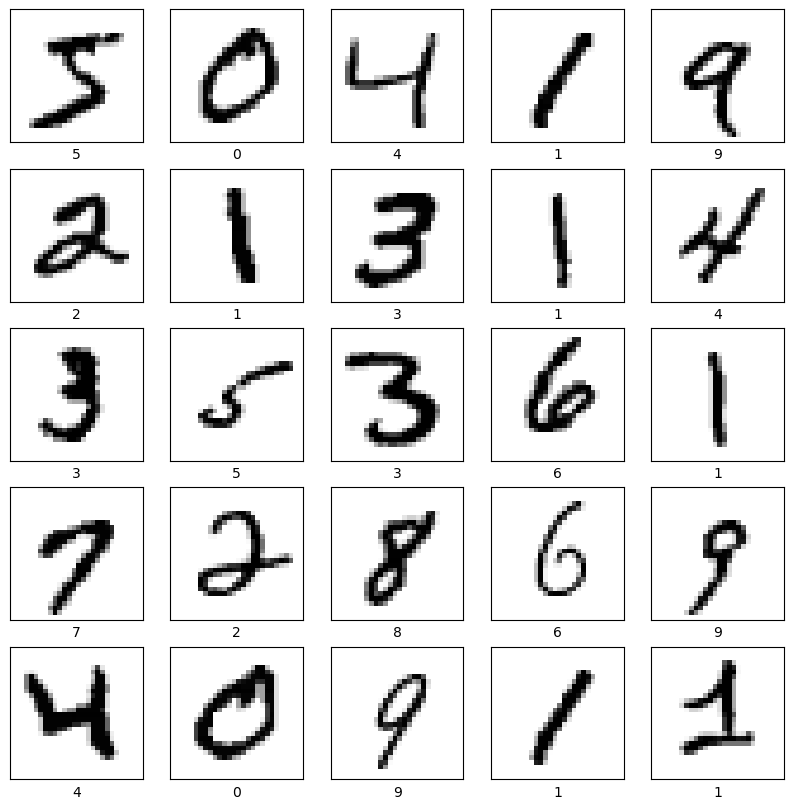

In [111]:
# Set up a 10x10 figure
plt.figure(figsize=(10,10))

# Loop over the first 25 images
for i in range(25):
    # Set up a 5x5 grid for the images
    plt.subplot(5,5,i+1)
    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])
    # Remove grid
    plt.grid(False)
    # Display the image in binary color map
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Label the image with its class name
    plt.xlabel(train_labels[i])

## Shape Inspection

In [112]:
print("Dimensions of the training images (X_train):", train_images.shape, '\n')
print("Dimensions of the training labels (y_train):", train_labels.shape, '\n')
print("Dimensions of the testing images (X_test):", test_images.shape, '\n')
print("Dimensions of the testing labels (y_test):", test_labels.shape, '\n')

Dimensions of the training images (X_train): (60000, 28, 28) 

Dimensions of the training labels (y_train): (60000,) 

Dimensions of the testing images (X_test): (10000, 28, 28) 

Dimensions of the testing labels (y_test): (10000,) 



Pixels of the image:


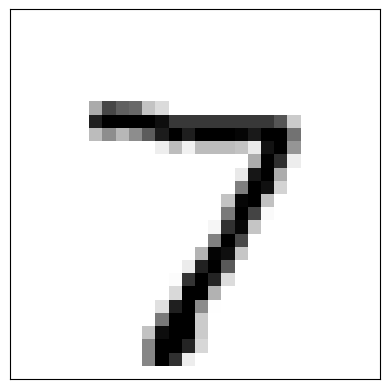

Pixel values of the image:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 1

In [113]:
def display_image_and_pixels(image):
    """Display an image and its pixel values."""
    
    # Display the image
    print("Pixels of the image:")
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

    # Print the pixel values
    print("Pixel values of the image:")
    for row in image:
        for pixel in row:
            print("{:3}".format(pixel), end=' ')
        print()

# Call the function with the first image in the test set
display_image_and_pixels(test_images[0])

Pixels after Normalization of the first image in the test set:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   1   1  

<Figure size 640x480 with 0 Axes>

<Axes: >

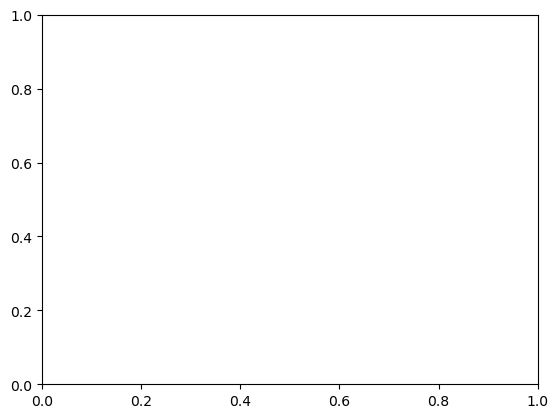

In [115]:
print("Pixels after Normalization of the first image in the test set:")
for row in test_images[0]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end=' ')
    print()

# Reshape the first test image to include a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Display the complete output of the first test image
display(plt.gcf())
display(plt.gca())

In [116]:

# Define a function to load images
def load_images(image_paths, target_size=(28, 28)):
    # Initialize an empty list to store the images
    images = []
    # Loop over the image paths
    for img_path in image_paths:
        # Load the image in grayscale and resize it to the target size
        img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
        # Convert the image to a numpy array
        img_array = image.img_to_array(img)
        # Append the image array to the list of images
        images.append(img_array)
    # Return the list of images as a numpy array
    return np.array(images)

# List of image paths
image_paths = ['images/0.jpg', 'images/1.jpg', 'images/2.jpg', 'images/3.jpg', 'images/4.jpg', 'images/5.jpg', 'images/6.jpg', 'images/7.jpg', 'images/8.jpg', 'images/9.jpg']

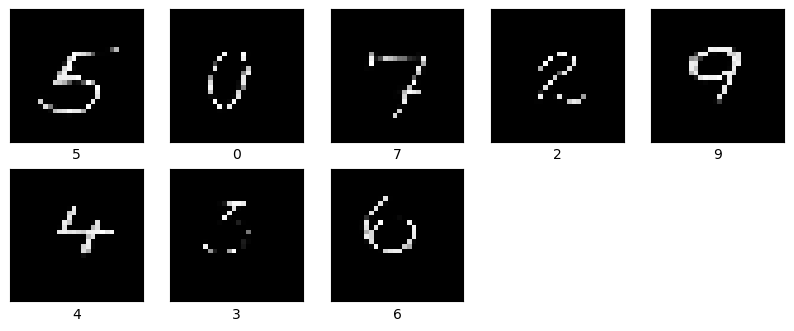

In [117]:
plt.figure(figsize=(10, 10))
for i in range(len(x_train)):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_train[i]), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()


In [118]:
from tensorflow.keras import layers
# Create an input layer.
input_layer = layers.Input(shape=(28, 28, 1))

# Define the CNN model
model = tf.keras.Sequential([
    # Add the convolutional layers
    input_layer,        # Add the input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),    # Add the first convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),    # Add the second convolutional layer
    layers.MaxPooling2D((2, 2)),        # Add the max pooling layer
    layers.Flatten(),        # Add the flatten layer
    layers.Dense(10, activation='softmax')        # Add the output layer
])

In [119]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1440)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                14410     
                                                                 
Total params: 15,420
Trainable params: 15,420
Non-trainable params: 0
__________________________________________________

In [120]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 40s 53ms/step - loss: 0.3206 - accuracy: 0.9086 - val_loss: 0.1180 - val_accuracy: 0.9667
Epoch 2/5
750/750 [==============================] - 33s 44ms/step - loss: 0.1003 - accuracy: 0.9700 - val_loss: 0.0901 - val_accuracy: 0.9743
Epoch 3/5
750/750 [==============================] - 59s 79ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0752 - val_accuracy: 0.9785
Epoch 4/5
750/750 [==============================] - 26s 34ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0721 - val_accuracy: 0.9799
Epoch 5/5
750/750 [==============================] - 27s 35ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0610 - val_accuracy: 0.9833


In [121]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

  1/313 [..............................] - ETA: 41s - loss: 0.0501 - accuracy: 0.9688

313/313 [==============================] - 3s 9ms/step - loss: 0.0551 - accuracy: 0.9831
Test accuracy: 0.9830999970436096
Test loss: 0.055145177990198135


In [122]:
# Save the model
model.save("mnist_model.h5")

In [123]:
from keras.models import load_model
# Load the saved model
mnist_model = load_model('mnist_model.h5')

## FUNCTION

1/1 [==============================] - 0s 72ms/step
--------------------------------------------------
Model Predict the number: 2
The Original Picture is:


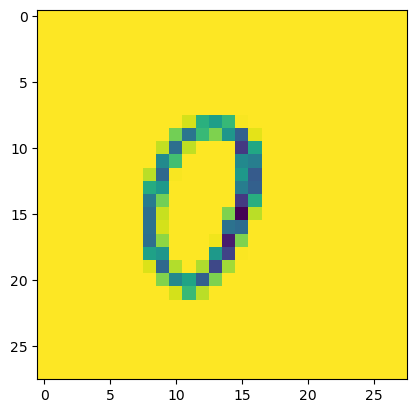

1/1 [==============================] - 0s 23ms/step
--------------------------------------------------
Model Predict the number: 2
The Original Picture is:


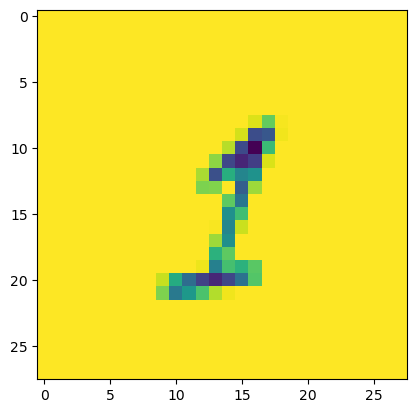

1/1 [==============================] - 0s 18ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


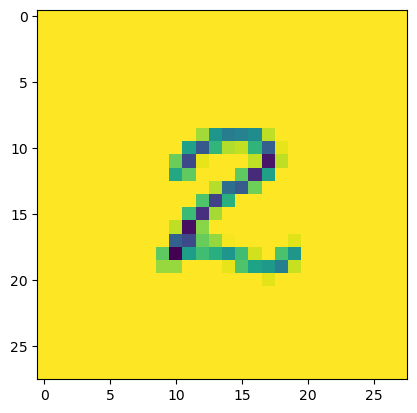

1/1 [==============================] - 0s 18ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


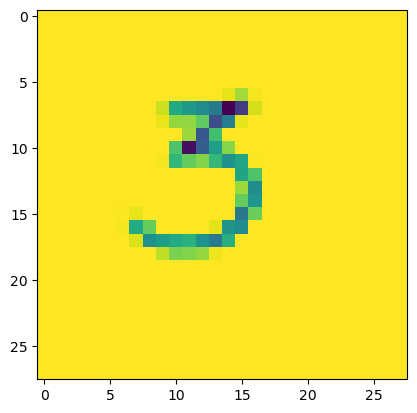

1/1 [==============================] - 0s 16ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


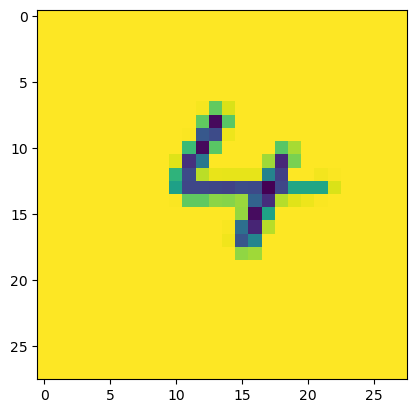

1/1 [==============================] - 0s 19ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


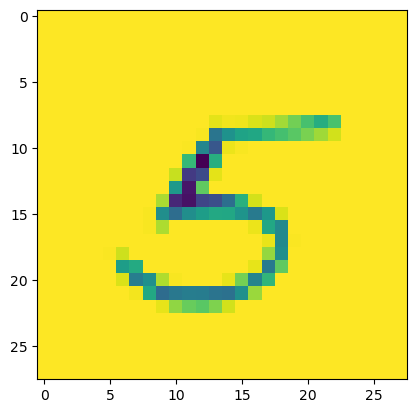

1/1 [==============================] - 0s 18ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


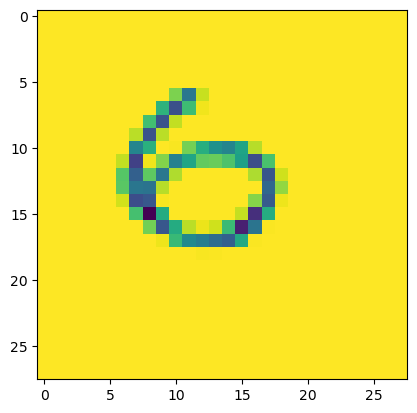

1/1 [==============================] - 0s 20ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


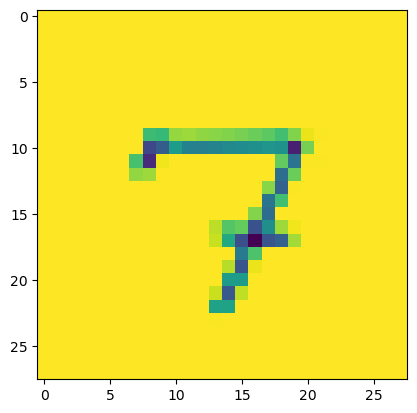

1/1 [==============================] - 0s 18ms/step
--------------------------------------------------
Model Predict the number: 3
The Original Picture is:


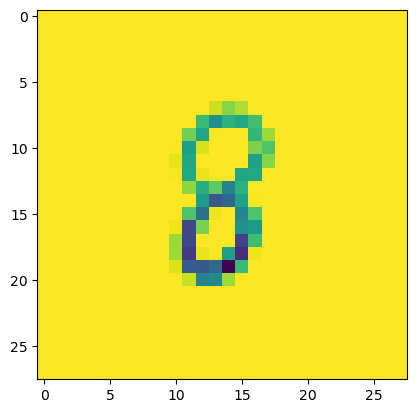

1/1 [==============================] - 0s 21ms/step
--------------------------------------------------
Model Predict the number: 8
The Original Picture is:


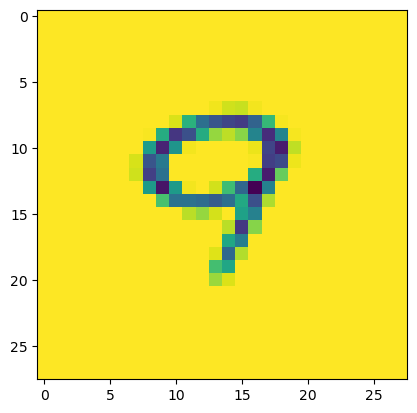

In [124]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_paths, mnist_model):
    for img_path in image_paths:
        img = Image.open(img_path).convert('L').resize((28, 28))
        img_array = np.expand_dims(np.array(img), axis=0).reshape((1, 28, 28, 1)).astype('float32') / 255.0
        prediction = np.argmax(mnist_model.predict(img_array)[0])
        print('-'*50)
        print(f"Model Predict the number: {prediction}")
        print("The Original Picture is:")
        plt.imshow(img)
        plt.show()

predict_image(image_paths, mnist_model)